In [2]:
#import 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from requests import get

In [1]:
import fmpclient

In [15]:
from collections import defaultdict

In [9]:
api = fmpclient.FMPClient()

In [407]:
stock_list = ['TZOO','GTX','LXRX','MCFT','MIK','TUP','XRX','OXY',
             'EBIX','XSPA','NSP','RUTH','ROSE', 
             'AGS','AXTA','CSU','FLDM','STOR','AAL','CHK',
             'HUD','NUS','AXAS','SITO','STIM','SYF','SU','STNE','GM','BAC','DAL','BAK']

In [408]:
def url_import(stock_list, info_type,params = {'datatype': 'json'}): 
    
    
    #dict_info = dict_maker(stock_list)
    dict_info = defaultdict(list)
    err_list = []
    url_list = ['''https://fmpcloud.io/api/v3/{info_type}/{stock}?apikey=cb3b0c371586d9ce915d359479fe1c81'''
                .format(info_type=info_type, stock = stock) 
    for stock in stock_list]

    print(url_list[0])
    for url, stock in zip(url_list,stock_list):
        try:
            #import financial ratios
            financial = api.requester.GET(url, params)
           
        
            for period_dict in financial: 

                for key, value in period_dict.items():
                    

                   # if key == 'date': 
                    #    dict_info[stock]['date'].append(value)
                    
                    dict_info[key].append(value)
        
        except: 
            err_list.append(stock)
            pass 
        
        
    
            
    return dict_info, err_list       

In [409]:
def url_import_latest(stock_list, info_type,params = {'datatype': 'json'}): 
    
    
    #dict_info = dict_maker(stock_list)
    dict_info = defaultdict(list)
    err_list = []
    url_list = ['''https://fmpcloud.io/api/v3/{info_type}/{stock}?apikey=cb3b0c371586d9ce915d359479fe1c81'''
                .format(info_type=info_type, stock = stock) 
    for stock in stock_list]

    print(url_list[0])
    for url, stock in zip(url_list,stock_list):
        try:
            #import financial ratios
            financial = api.requester.GET(url, params)
           
        

            for key, value in financial[0].items():
                
                    

                   # if key == 'date': 
                    #    dict_info[stock]['date'].append(value)
                    
                dict_info[key].append(value)
        
        except: 
            err_list.append(stock)
            pass 
        
        
    
            
    return dict_info, err_list

In [410]:
dict_main,err_main = url_import_latest(stock_list,'quote')

https://fmpcloud.io/api/v3/quote/TZOO?apikey=cb3b0c371586d9ce915d359479fe1c81


In [411]:
err_main

[]

In [412]:
df_main = pd.DataFrame(dict_main)

In [413]:
df_main.columns

Index(['symbol', 'name', 'price', 'changesPercentage', 'change', 'dayLow',
       'dayHigh', 'yearHigh', 'yearLow', 'marketCap', 'priceAvg50',
       'priceAvg200', 'volume', 'avgVolume', 'exchange', 'open',
       'previousClose', 'eps', 'pe', 'earningsAnnouncement',
       'sharesOutstanding', 'timestamp'],
      dtype='object')

In [414]:
#drop bs 
df_main.drop(['dayLow',
       'dayHigh','exchange', 'open',
       'previousClose','timestamp'], axis = 1,inplace = True)

In [415]:
#making columns
rtrn_high = (2000/df_main['price']) * df_main['yearHigh']
rtrn_avg200 = (2000/df_main['price']) *df_main['priceAvg200']
rtrn_avg50 = (2000/df_main['price']) *df_main['priceAvg50']
rtrn_avg = (2000/df_main['price']) *df_main[['priceAvg50','priceAvg200','yearHigh']].mean(axis = 1)
pct_change200 = np.round((df_main['price'] - df_main['priceAvg200'])/df_main['priceAvg200'] 
                          * 100, 2)

                          
pct_change_50 = np.round((df_main['price'] - df_main['priceAvg50'])/df_main['priceAvg50'] 
                          * 100, 2)


In [416]:
df_main.insert(5,'pct_change50', pct_change_50)
df_main.insert(6,'pct_change200',pct_change200)

In [417]:
df_main['rtrn_high'] = rtrn_high
df_main['rtrn_avg200'] = rtrn_avg200
df_main['rtrn_avg50'] = rtrn_avg50
df_main['rtrn_avg'] = rtrn_avg


In [418]:
df_main['dol_vol'] = df_main['price'] * df_main['avgVolume']

In [419]:
def volume_type(x): 
        
        typ = ''
        if x <= 2E06:
            typ ='l'
        elif x > 100E06: 
            typ = 'h'
        else: 
            typ = 'n'
    
        return typ
    

In [420]:
df_main.drop(['volume', 'avgVolume'],axis = 1,inplace = True)

In [421]:
df_main['vol_type'] = df_main['dol_vol'].apply(lambda x: volume_type(x))

In [422]:
df_main.drop('earningsAnnouncement',axis = 1, inplace = True)

In [423]:
pd.set_option('display.max_columns', None)

In [424]:
df_main.set_index('symbol',inplace = True)

# main ranks

In [425]:
df_main

,name,price,changesPercentage,change,pct_change50,pct_change200,yearHigh,yearLow,marketCap,priceAvg50,priceAvg200,eps,pe,sharesOutstanding,rtrn_high,rtrn_avg200,rtrn_avg50,rtrn_avg,dol_vol,vol_type
symbol,,,,,,,,,,,,,,,,,,,,
TZOO,Travelzoo,4.4700,-2.40,-0.1100,-7.53,-50.32,22.85,3.040,5.055748e+07,4.834000,8.997007,0.350,12.771428,11310400,10223.713647,4025.506488,2162.863535,5470.694556,6.111339e+05,l
GTX,Garrett Motion Inc.,4.0000,16.62,0.5700,1.34,-51.17,19.41,2.500,3.022864e+08,3.947143,8.191168,4.120,0.970874,75571600,9705.000000,4095.584000,1973.571400,5258.051800,4.122584e+06,n
LXRX,"Lexicon Pharmaceuticals, Inc.",1.8600,0.00,0.0000,-9.10,-42.93,7.27,1.130,1.989642e+08,2.046286,3.259343,1.158,1.606218,106970000,7817.204301,3504.670000,2200.307097,4507.393799,1.772558e+06,l
MCFT,"MasterCraft Boat Holdings, Inc.",8.6700,14.53,1.1000,4.33,-39.40,26.74,4.900,1.636220e+08,8.310142,14.307116,0.974,8.901438,18872200,6168.396770,3300.372895,1916.987889,3795.252518,2.748329e+06,n
MIK,"The Michaels Companies, Inc.",2.2500,3.21,0.0700,-4.86,-62.74,12.86,1.000,3.304058e+08,2.365000,6.038394,1.777,1.266179,146784992,11431.111111,5367.461333,2102.222222,6300.264889,1.103476e+07,n
TUP,Tupperware Brands Corporation,2.1100,8.21,0.1600,12.11,-70.53,24.16,1.150,1.033288e+08,1.882000,7.161022,0.250,8.440000,48971000,22900.473934,6787.698294,1783.886256,10490.686161,6.224656e+06,n
XRX,Xerox Holdings Corporation,17.3900,1.76,0.3000,-14.83,-45.36,39.47,15.010,3.701131e+09,20.418000,31.826132,5.803,2.996726,212831008,4539.390454,3660.279701,2348.246118,3515.972091,5.354805e+07,n
OXY,Occidental Petroleum Corporation,13.8700,6.53,0.8500,-1.49,-58.96,63.42,9.000,1.271570e+10,14.079715,33.792480,-1.219,NaN,916777024,9144.917087,4872.744052,2030.240087,5349.300409,4.899067e+08,h
EBIX,"Ebix, Inc.",17.0700,-1.22,-0.2100,3.38,-44.46,53.94,8.750,5.202202e+08,16.512000,30.735110,3.160,5.401898,30475700,6319.859402,3601.067370,1934.622144,3951.849639,1.076195e+07,n


In [426]:
def main_filter(df): 
    
    dict_main = defaultdict(float)
    for symbol in df.index.tolist():
        
        
        dict_main[symbol] = 0
        ser = df.loc[symbol,:]
        
        if ser['price'] < 5: 
            dict_main[symbol] +=1
            
        if np.abs(ser['pct_change50']) >= 10: 
            dict_main[symbol] +=1
            
        if np.abs(ser['pct_change200']) >=40: 
            dict_main[symbol] +=1
            
        if ser['rtrn_high'] >= 10E03: 
            dict_main[symbol] +=2
            
        if ser['rtrn_avg200'] >= 5E03: 
            
            dict_main[symbol] +=2
            
        if ser['rtrn_avg50'] >= 3E03:
            dict_main[symbol] +=1
            
        if ser['rtrn_avg'] >= 5E03: 
            
            dict_main[symbol] +=2
        
        if ser['eps'] > 0.5: 
            dict_main[symbol] +=1
            
        
        
        
    dict_main_final = defaultdict(str)
            
    for symbol, count in dict_main.items(): 
        if count >= 6: 
            dict_main_final[symbol] = 's'
        elif count >= 4: 
            dict_main_final[symbol] = 'a'
        elif count >=3: 
            dict_main_final[symbol] = 'b'
        else: 
            dict_main_final[symbol] = 'c'
            
    df['rnk_main'] = dict_main_final.values()        
    return df

In [427]:
df_main = main_filter(df_main)

In [428]:
df_main.loc[df_main.rnk_main =='s']

,name,price,changesPercentage,change,pct_change50,pct_change200,yearHigh,yearLow,marketCap,priceAvg50,priceAvg200,eps,pe,sharesOutstanding,rtrn_high,rtrn_avg200,rtrn_avg50,rtrn_avg,dol_vol,vol_type,rnk_main
symbol,,,,,,,,,,,,,,,,,,,,,
TZOO,Travelzoo,4.4700,-2.40,-0.1100,-7.53,-50.32,22.85,3.040,50557484.0,4.834000,8.997007,0.350,12.771428,11310400,10223.713647,4025.506488,2162.863535,5470.694556,6.111339e+05,l,s
MIK,"The Michaels Companies, Inc.",2.2500,3.21,0.0700,-4.86,-62.74,12.86,1.000,330405760.0,2.365000,6.038394,1.777,1.266179,146784992,11431.111111,5367.461333,2102.222222,6300.264889,1.103476e+07,n,s
TUP,Tupperware Brands Corporation,2.1100,8.21,0.1600,12.11,-70.53,24.16,1.150,103328808.0,1.882000,7.161022,0.250,8.440000,48971000,22900.473934,6787.698294,1783.886256,10490.686161,6.224656e+06,n,s
XSPA,"XpresSpa Group, Inc.",0.4800,-13.12,-0.0725,62.79,-35.99,5.45,0.050,41520096.0,0.294857,0.749927,-4.330,NaN,86500200,22708.333333,3124.695833,1228.571417,9020.533528,6.992857e+06,n,s
ROSE,Rosehill Resources Inc.,0.3820,15.97,0.0526,-10.10,-63.06,5.11,0.250,17006182.0,0.424914,1.033978,-1.613,NaN,28811100,26753.926702,5413.497906,2224.682199,11464.035602,3.677262e+05,l,s
AGS,"PlayAGS, Inc.",2.7800,1.09,0.0300,-12.10,-69.22,25.25,0.701,98813984.0,3.162571,9.031168,-0.332,NaN,35534600,18165.467626,6497.243165,2275.231223,8979.314005,2.080674e+06,n,s
CSU,Capital Senior Living Corporation,0.8915,-4.57,-0.0427,5.49,-68.25,5.64,0.450,28489130.0,0.845143,2.807956,-1.191,NaN,31956400,12652.832305,6299.396971,1896.001884,6949.410387,1.509096e+05,l,s
CHK,Chesapeake Energy Corporation,27.4900,36.22,7.3100,-17.11,-78.63,616.00,12.300,268962144.0,33.163430,128.662190,NaN,NaN,9784000,44816.296835,9360.654056,2412.763187,18863.238026,1.039269e+08,h,s


# import income 

In [429]:
dict_income,errs_income = url_import(stock_list, 'income-statement')

https://fmpcloud.io/api/v3/income-statement/TZOO?apikey=cb3b0c371586d9ce915d359479fe1c81


In [430]:
df_income_date = pd.DataFrame(dict_income)

In [431]:
df_income_date.set_index(['symbol','date'], inplace = True)

In [432]:
df_income_date.columns

Index(['period', 'revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses', 'otherExpenses', 'operatingExpenses',
       'costAndExpenses', 'interestExpense', 'depreciationAndAmortization',
       'ebitda', 'ebitdaratio', 'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil'],
      dtype='object')

# making df of averages, changes and current

In [453]:
df_income_avg = df_income_date.groupby(['symbol']).agg({'eps':['first','mean'],
                                                       'revenue': 'first'})

In [461]:
df_income_avg['revenue'] = df_income_avg['revenue'] / 1E06

In [462]:
df_income_avg['revenue']

,first
symbol,
AAL,45768.000
AGS,304.714
AXTA,4696.000
CHK,8595.000
CSU,447.100
EBIX,580.615
FLDM,117.243
GTX,3248.000
LXRX,322.073


In [446]:
df_income_avg['shares']= df_main['sharesOutstanding']

In [464]:
df_income_date.loc['TZOO']

,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,shares
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,FY,111412000.0,11889000.0,99523000.0,0.893288,6885000.0,22824000.0,60350000.0,0.0,90059000.0,101948000.0,0.0,1318000.0,10782000.0,0.096776,9464000.0,0.084946,0.0,8949000.0,0.080323,4794000.0,4155000.0,0.037294,0.35,0.35,11809000.0,12035000.0,NaN
2018-12-31,FY,111322000.0,12268000.0,99054000.0,0.889797,8993000.0,23304000.0,58519000.0,0.0,90816000.0,103084000.0,0.0,1828000.0,10066000.0,0.090422,8238000.0,0.074002,0.0,8286000.0,0.074433,3625000.0,4661000.0,0.041870,0.38,0.37,12323000.0,12510000.0,NaN
2017-12-31,FY,106524000.0,12909000.0,93615000.0,0.878816,9224000.0,22558000.0,57288000.0,0.0,89070000.0,101979000.0,0.0,2075000.0,6620000.0,0.062146,4545000.0,0.042666,0.0,4718000.0,0.044290,3126000.0,3530000.0,0.033138,0.27,0.27,12882000.0,12894000.0,NaN
2016-12-31,FY,128552000.0,14313000.0,114239000.0,0.888660,9445000.0,22697000.0,71029000.0,0.0,103171000.0,117484000.0,0.0,2530000.0,13598000.0,0.105778,11068000.0,0.086097,0.0,10881000.0,0.084643,4250000.0,6631000.0,0.051582,0.47,0.47,13997000.0,13997000.0,NaN
2015-12-31,FY,141716000.0,18824000.0,122892000.0,0.867171,12528000.0,24176000.0,79042000.0,0.0,115746000.0,134570000.0,0.0,2788000.0,9934000.0,0.070098,7146000.0,0.050425,0.0,5904000.0,0.041661,-4960000.0,10864000.0,0.076660,0.74,0.74,14722000.0,14722000.0,NaN
2014-12-31,FY,142076000.0,17906000.0,124170000.0,0.873969,0.0,43470000.0,67233000.0,0.0,110703000.0,128609000.0,0.0,2824000.0,23874000.0,0.168037,21050000.0,0.148160,0.0,21191000.0,0.149153,4839000.0,16352000.0,0.115093,1.11,1.10,14768000.0,14809000.0,NaN
2013-12-31,FY,158234000.0,17402000.0,140832000.0,0.890024,0.0,41684000.0,74870000.0,22000000.0,138554000.0,155956000.0,0.0,2980000.0,5258000.0,0.033229,2278000.0,0.014396,0.0,2707000.0,0.017108,7718000.0,-5011000.0,-0.031668,-0.33,-0.33,15269000.0,15269000.0,NaN
2012-12-31,FY,151168000.0,15745000.0,135423000.0,0.895844,0.0,38692000.0,68242000.0,3000000.0,109934000.0,125679000.0,0.0,2539000.0,28028000.0,0.185410,25489000.0,0.168614,0.0,25798000.0,0.170658,7600000.0,18198000.0,0.120383,1.15,1.14,15866000.0,15901000.0,NaN
2011-12-31,FY,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,NaN


In [75]:
df_income_date.loc['LEGH',:]

,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,costAndExpenses,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
date,,,,,,,,,,,,,,,,
2019-12-31,168956000.0,104903000.0,64053000.0,0.379111,0.0,130385000.0,38854000.0,0.229965,37840000.0,0.223964,28844000.0,0.170719,1.18,1.18,24379667.0,24436954.0


In [488]:
#getting changes for specific cols 
to_get_income = ['revenue', 'operatingIncome','netIncome','costOfRevenue',
                 'researchAndDevelopmentExpenses','ebitda','eps', 
                 'epsdiluted'
                ]



In [489]:
#change function
def filter_df(df, to_get): 
    
    
    new_dict = defaultdict(list)
    for symbol in stock_list: 
        new_dict['symbol'].append(symbol)
        for column in df.columns.tolist():
            if column in to_get:
                vals = df.loc[symbol,column].tolist()
                #print(vals)
                val_latest = vals[0]
                if len(vals) == 1: 
                    val_change = 0
                    val_avg = np.mean(vals)

                #append 
                    new_dict[column].append(val_latest)
                    new_dict[column + '_prev'].append(np.nan)
                    new_dict[column +'_change'].append(val_change)
                    new_dict[column +'_avg'].append(val_avg)
                
                else:
                    val_change = np.round(((vals[0] - vals[1])/np.abs(vals[1])) *100,3)
                    val_avg = np.mean(vals)

                    #append 
                    new_dict[column].append(val_latest)
                    new_dict[column + '_prev'].append(vals[1])
                    new_dict[column +'_change'].append(val_change)
                    new_dict[column +'_avg'].append(val_avg)
            else: 
                vals = df.loc[symbol,column].tolist()
                new_dict[column].append(vals[0])

    return new_dict

In [490]:
df_income = pd.DataFrame(filter_df(df_income_date, to_get_income))

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


In [491]:
df_income

,symbol,period,revenue,revenue_prev,revenue_change,revenue_avg,costOfRevenue,costOfRevenue_prev,costOfRevenue_change,costOfRevenue_avg,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,researchAndDevelopmentExpenses_prev,researchAndDevelopmentExpenses_change,researchAndDevelopmentExpenses_avg,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitda_prev,ebitda_change,ebitda_avg,ebitdaratio,operatingIncome,operatingIncome_prev,operatingIncome_change,operatingIncome_avg,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncome_prev,netIncome_change,netIncome_avg,netIncomeRatio,eps,eps_prev,eps_change,eps_avg,epsdiluted,epsdiluted_prev,epsdiluted_change,epsdiluted_avg,weightedAverageShsOut,weightedAverageShsOutDil,shares
0,TZOO,FY,1.114120e+08,1.113220e+08,0.081,1.167782e+08,1.188900e+07,1.226800e+07,-3.089,1.347289e+07,9.952300e+07,0.893288,6885000.0,8993000.0,-23.440,5.230556e+06,2.282400e+07,6.035000e+07,0.000000e+00,9.005900e+07,1.019480e+08,0.000000e+00,1.318000e+06,1.078200e+07,1.006600e+07,7.113,1.201778e+07,0.096776,9.464000e+06,8.238000e+06,14.882,9.919778e+06,0.084946,0.0,8.949000e+06,0.080323,4794000.0,4.155000e+06,4.661000e+06,-10.856,6.597778e+06,0.037294,0.35,0.38,-7.895,0.460000,0.35,0.37,-5.405,0.456667,1.180900e+07,1.203500e+07,NaN
1,GTX,FY,3.248000e+09,3.375000e+09,-3.763,3.311500e+09,2.537000e+09,2.599000e+09,-2.386,2.568000e+09,7.110000e+08,0.218904,129000000.0,128000000.0,0.781,1.285000e+08,2.490000e+08,0.000000e+00,0.000000e+00,3.780000e+08,2.915000e+09,6.800000e+07,8.200000e+07,4.280000e+08,4.680000e+08,-8.547,4.480000e+08,0.131773,3.460000e+08,3.960000e+08,-12.626,3.710000e+08,0.106527,-8000000.0,3.460000e+08,0.106527,33000000.0,3.130000e+08,1.180000e+09,-73.475,7.465000e+08,0.096367,4.20,15.93,-73.635,10.065000,4.12,15.86,-74.023,9.990000,7.460287e+07,7.593437e+07,NaN
2,LXRX,FY,3.220730e+08,6.320900e+07,409.537,7.966467e+07,3.231000e+06,2.491000e+06,29.707,8.467778e+05,3.188420e+08,0.989968,91924000.0,100243000.0,-8.299,1.084090e+08,5.683500e+07,0.000000e+00,3.186900e+07,1.806280e+08,1.838590e+08,2.067600e+07,5.119000e+06,1.465640e+08,-9.826000e+07,249.159,-6.972389e+07,0.455065,1.414450e+08,-1.032790e+08,236.954,-7.327211e+07,0.439171,0.0,1.241190e+08,0.385375,-6000000.0,1.301330e+08,-1.205480e+08,207.951,-7.738022e+07,0.404048,1.23,-1.14,207.895,-0.390000,1.16,-1.14,201.754,-0.397778,1.062180e+08,1.062180e+08,NaN
3,MCFT,FY,4.663810e+08,3.327250e+08,40.170,3.123350e+08,3.532540e+08,2.423610e+08,45.755,2.303235e+08,1.131270e+08,0.242563,5566000.0,4933000.0,12.832,4.389250e+06,2.770600e+07,1.767000e+07,2.892600e+07,7.986800e+07,4.331220e+08,6.513000e+06,8.340000e+06,4.159900e+07,6.156500e+07,-32.431,4.145875e+07,0.089195,3.325900e+07,5.598300e+07,-40.591,3.619200e+07,0.071313,0.0,2.674600e+07,0.057348,5392000.0,2.135400e+07,3.965300e+07,-46.148,2.269675e+07,0.045787,1.14,2.13,-46.479,1.222500,1.14,2.12,-46.226,1.217500,1.865389e+07,1.876821e+07,NaN
4,MIK,FY,5.072037e+09,5.271944e+09,-3.792,5.092336e+09,3.199780e+09,3.248276e+09,-1.493,3.105356e+09,1.872257e+09,0.369133,0.0,0.0,NaN,0.000000e+00,1.304280e+09,0.000000e+00,0.000000e+00,1.304280e+09,4.504060e+09,1.540900e+08,1.298210e+08,6.448580e+08,6.923620e+08,-6.861,7.706870e+08,0.127140,5.150370e+08,5.636120e+08,-8.619,6.461538e+08,0.101544,0.0,3.583710e+08,0.070656,85776000.0,2.725950e+08,3.195450e+08,-14.693,3.234515e+08,0.053745,1.78,1.87,-4.813,1.736667,1.78,1.86,-4.301,1.721667,1.531340e+08,1.532020e+08,NaN
5,TUP,FY,2.069700e+09,2.255800e+09,-8.250,2.396589e+09,6.922000e+08,7.446000e+08,-7.037,7.950111e+08,1.377500e+09,0.665555,15000000.0,16700000.0,-10.180,1.620000e+07,1.060500e+09,0.000000e+00,0.000000e+00,1.075500e+09,1.767700e+09,4.650000e+07,5.880000e+07,3.786000e+08,2.902000e+08,30.462,3.802778e+08,0.182925,3.198000e+08,2.291000e+08,39.590,3.289444e+08,0.154515,0.

In [492]:
df_income.set_index('symbol',inplace = True)

In [494]:
df_income['shares'] = df_main['sharesOutstanding']

In [495]:
df_income['price'] = df_main['price']

In [496]:
df_income['ern_yld'] = df_income['eps'] / df_income['price']

In [498]:
df_income.drop('period',axis = 1,inplace = True)

In [90]:
df_income.columns.values

array(['price', 'shares', 'revenue', 'revenue_prev', 'revenue_change',
       'revenue_avg', 'costOfRevenue', 'costOfRevenue_prev',
       'costOfRevenue_change', 'costOfRevenue_avg', 'grossProfit',
       'grossProfitRatio', 'researchAndDevelopmentExpenses',
       'researchAndDevelopmentExpenses_prev',
       'researchAndDevelopmentExpenses_change',
       'researchAndDevelopmentExpenses_avg', 'costAndExpenses', 'ebitda',
       'ebitda_prev', 'ebitda_change', 'ebitda_avg', 'ebitdaratio',
       'operatingIncome', 'operatingIncome_prev',
       'operatingIncome_change', 'operatingIncome_avg',
       'operatingIncomeRatio', 'netIncome', 'netIncome_prev',
       'netIncome_change', 'netIncome_avg', 'netIncomeRatio', 'eps',
       'eps_prev', 'eps_change', 'eps_avg', 'epsdiluted',
       'epsdiluted_prev', 'epsdiluted_change', 'epsdiluted_avg',
       'weightedAverageShsOut', 'weightedAverageShsOutDil', 'ern_yld'],
      dtype=object)

# filtering income 

In [124]:
def income_filter(df): 
    dict_income = defaultdict(int)
    for symbol in df.index.tolist():
        
        dict_income[symbol]
        dict_income[symbol] = 0
        ser = df.loc[symbol,'revenue':]
        if (ser['revenue_change'] > 0) or (ser['revenue'] > ser['revenue_avg']):
            dict_income[symbol] += 2
            
        if ser['revenue_change'] > 3: 
            
            dict_income[symbol] += 2

        
        if ser['grossProfitRatio'] > 0.2:
            dict_income[symbol] += 1
 
        if ser['costOfRevenue'] < ser['costOfRevenue_avg']: 
           dict_income[symbol] += 1

        if ser['costOfRevenue_change'] < ser['revenue_change']: 
            dict_income[symbol] += 1

        if ser['operatingIncomeRatio'] >= 0.1: 
            
            dict_income[symbol] += 1
        if ser['operatingIncome'] > ser['operatingIncome_avg'] or ser['operatingIncome_change'] >0:
            dict_income[symbol] +=1
            
        if ser['netIncome'] > ser['netIncome_avg'] or ser['netIncome_change'] > 1 or ser['netIncomeRatio'] > 0:
            dict_income[symbol] += 1
        if ser['netIncomeRatio'] >= 0.1:
            dict_income[symbol] += 2 
        if ser['researchAndDevelopmentExpenses_change'] > 0 or ser['researchAndDevelopmentExpenses'] > ser['researchAndDevelopmentExpenses_avg']: 
            dict_income[symbol] += 1
        if ser['eps_change'] > 0 or ser['eps'] > ser['eps_avg']: 
            dict_income[symbol] += 1
        
        if ser['ern_yld'] > 0: 
            
            if ser['ern_yld'] > 0.2:
                dict_income[symbol] +=2
            else: 
                dict_income[symbol] += 1
        if ser['ebitda'] >0.2: 
            dict_income[symbol] += 2
        if ser['ebitda'] > ser['ebitda_avg']: 
            dict_income[symbol] += 1
            
            
    dict_income_final = defaultdict(str)
            
    for symbol, count in dict_income.items(): 
        if count >= 11: 
            dict_income_final[symbol] = 's'
        elif count >= 9: 
            dict_income_final[symbol] = 'a'
        elif count >=7: 
            dict_income_final[symbol] = 'b'
        else: 
            dict_income_final[symbol] = 'c'
    
          
        
    df['rnk_income'] = dict_income_final.values()        
    return df

In [125]:
df_income = income_filter(df_income)

In [126]:
df_income

,price,shares,revenue,revenue_prev,revenue_change,revenue_avg,costOfRevenue,costOfRevenue_prev,costOfRevenue_change,costOfRevenue_avg,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,researchAndDevelopmentExpenses_prev,researchAndDevelopmentExpenses_change,researchAndDevelopmentExpenses_avg,costAndExpenses,ebitda,ebitda_prev,ebitda_change,ebitda_avg,ebitdaratio,operatingIncome,operatingIncome_prev,operatingIncome_change,operatingIncome_avg,operatingIncomeRatio,netIncome,netIncome_prev,netIncome_change,netIncome_avg,netIncomeRatio,eps,eps_prev,eps_change,eps_avg,epsdiluted,epsdiluted_prev,epsdiluted_change,epsdiluted_avg,weightedAverageShsOut,weightedAverageShsOutDil,ern_yld,rnk_income
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,4.41,11310400,1.114120e+08,1.113220e+08,0.081,1.167782e+08,1.188900e+07,1.226800e+07,-3.089,1.347289e+07,9.952300e+07,0.893288,6885000.0,8993000.0,-23.440,5.230556e+06,1.019480e+08,1.078200e+07,1.006600e+07,7.113,1.201778e+07,0.096776,9464000.0,8.238000e+06,14.882,9.919778e+06,0.084946,4.155000e+06,4.661000e+06,-10.856,6.597778e+06,0.037294,0.35,0.38,-7.895,0.460000,0.35,0.37,-5.405,0.456667,11809000.0,12035000.0,0.079365,s
GTX,3.75,75571600,3.248000e+09,3.375000e+09,-3.763,3.311500e+09,2.537000e+09,2.599000e+09,-2.386,2.568000e+09,7.110000e+08,0.218904,129000000.0,128000000.0,0.781,1.285000e+08,2.915000e+09,4.280000e+08,4.680000e+08,-8.547,4.480000e+08,0.131773,346000000.0,3.960000e+08,-12.626,3.710000e+08,0.106527,3.130000e+08,1.180000e+09,-73.475,7.465000e+08,0.096367,4.20,15.93,-73.635,10.065000,4.12,15.86,-74.023,9.990000,74602868.0,75934373.0,1.120000,a
LEGH,8.74,24762500,1.689560e+08,NaN,0.000,1.689560e+08,1.049030e+08,NaN,0.000,1.049030e+08,6.405300e+07,0.379111,0.0,NaN,0.000,0.000000e+00,1.303850e+08,3.885400e+07,NaN,0.000,3.885400e+07,0.229965,37840000.0,NaN,0.000,3.784000e+07,0.223964,2.884400e+07,NaN,0.000,2.884400e+07,0.170719,1.18,NaN,0.000,1.180000,1.18,NaN,0.000,1.180000,24379667.0,24436954.0,0.135011,b
LXRX,1.92,106970000,3.220730e+08,6.320900e+07,409.537,7.966467e+07,3.231000e+06,2.491000e+06,29.707,8.467778e+05,3.188420e+08,0.989968,91924000.0,100243000.0,-8.299,1.084090e+08,1.838590e+08,1.465640e+08,-9.826000e+07,249.159,-6.972389e+07,0.455065,141445000.0,-1.032790e+08,236.954,-7.327211e+07,0.439171,1.301330e+08,-1.205480e+08,207.951,-7.738022e+07,0.404048,1.23,-1.14,207.895,-0.390000,1.16,-1.14,201.754,-0.397778,106218000.0,106218000.0,0.640625,s
MCFT,7.54,18872200,4.663810e+08,3.327250e+08,40.170,3.123350e+08,3.532540e+08,2.423610e+08,45.755,2.303235e+08,1.131270e+08,0.242563,5566000.0,4933000.0,12.832,4.389250e+06,4.331220e+08,4.159900e+07,6.156500e+07,-32.431,4.145875e+07,0.089195,33259000.0,5.598300e+07,-40.591,3.619200e+07,0.071313,2.135400e+07,3.965300e+07,-46.148,2.269675e+07,0.045787,1.14,2.13,-46.479,1.222500,1.14,2.12,-46.226,1.217500,18653892.0,18768207.0,0.151194,s
MIK,2.18,146784992,5.072037e+09,5.271944e+09,-3.792,5.092336e+09,3.199780e+09,3.248276e+09,-1.493,3.105356e+09,1.872257e+09,0.369133,0.0,0.0,NaN,0.000000e+00,4.504060e+09,6.448580e+08,6.923620e+08,-6.861,7.706870e+08,0.127140,515037000.0,5.636120e+08,-8.619,6.461538e+08,0.101544,2.725950e+08,3.195450e+08,-14.693,3.234515e+08,0.053745,1.78,1.87,-4.813,1.736667,1.78,1.86,-4.301,1.721667,153134000.0,153202000.0,0.816514,b
QMCO,3.90,39858700,4.026800e+08,5.053450e+08,-20.316,4.659597e+08,2.350660e+08,2.919210e+08,-19.476,2.677750e+08,1.676140e+08,0.416246,32113000.0,44379000.0,-27.639,4.731229e+07,4.074260e+08,2.345000e+06,1.912900e+07,-87.741,1.401871e+07,0.005823,-4746000.0,1.214800e+07,-139.068,-2.057571e+06,-0.011786,-4.279700e+07,3.645000e+06,-1274.129,-1.447757e+07,-0.106280,-1.20,0.11,-1190.909,-0.188571,-1.20,0.11,-1190.909,-0.190000,35551000.0,35551000.0,-0.307692,c
SCS,9.25,89437696,3.443200e+09,3.055500e+09,12.689,3.032238e+09,2.355300e+09,2.049400e+09,14.926,2.069012e+09,1.087900e+09,0.315956,53700000.0,44000000.0,22.045,3.461250e+07,3.259600e+09,2.652000e+08,2.219000e+08,19.513,

In [135]:
df_income.loc[df_income.rnk_income == 's',:]

,price,shares,revenue,revenue_prev,revenue_change,revenue_avg,costOfRevenue,costOfRevenue_prev,costOfRevenue_change,costOfRevenue_avg,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,researchAndDevelopmentExpenses_prev,researchAndDevelopmentExpenses_change,researchAndDevelopmentExpenses_avg,costAndExpenses,ebitda,ebitda_prev,ebitda_change,ebitda_avg,ebitdaratio,operatingIncome,operatingIncome_prev,operatingIncome_change,operatingIncome_avg,operatingIncomeRatio,netIncome,netIncome_prev,netIncome_change,netIncome_avg,netIncomeRatio,eps,eps_prev,eps_change,eps_avg,epsdiluted,epsdiluted_prev,epsdiluted_change,epsdiluted_avg,weightedAverageShsOut,weightedAverageShsOutDil,ern_yld,rnk_income
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,4.41,11310400,1.114120e+08,1.113220e+08,0.081,1.167782e+08,1.188900e+07,1.226800e+07,-3.089,1.347289e+07,9.952300e+07,0.893288,6885000.0,8993000.0,-23.440,5.230556e+06,1.019480e+08,10782000.0,10066000.0,7.113,1.201778e+07,0.096776,9464000.0,8238000.0,14.882,9.919778e+06,0.084946,4155000.0,4661000.0,-10.856,6.597778e+06,0.037294,0.35,0.38,-7.895,0.4600,0.35,0.37,-5.405,0.456667,11809000.0,12035000.0,0.079365,s
LXRX,1.92,106970000,3.220730e+08,6.320900e+07,409.537,7.966467e+07,3.231000e+06,2.491000e+06,29.707,8.467778e+05,3.188420e+08,0.989968,91924000.0,100243000.0,-8.299,1.084090e+08,1.838590e+08,146564000.0,-98260000.0,249.159,-6.972389e+07,0.455065,141445000.0,-103279000.0,236.954,-7.327211e+07,0.439171,130133000.0,-120548000.0,207.951,-7.738022e+07,0.404048,1.23,-1.14,207.895,-0.3900,1.16,-1.14,201.754,-0.397778,106218000.0,106218000.0,0.640625,s
MCFT,7.54,18872200,4.663810e+08,3.327250e+08,40.170,3.123350e+08,3.532540e+08,2.423610e+08,45.755,2.303235e+08,1.131270e+08,0.242563,5566000.0,4933000.0,12.832,4.389250e+06,4.331220e+08,41599000.0,61565000.0,-32.431,4.145875e+07,0.089195,33259000.0,55983000.0,-40.591,3.619200e+07,0.071313,21354000.0,39653000.0,-46.148,2.269675e+07,0.045787,1.14,2.13,-46.479,1.2225,1.14,2.12,-46.226,1.217500,18653892.0,18768207.0,0.151194,s
SCS,9.25,89437696,3.443200e+09,3.055500e+09,12.689,3.032238e+09,2.355300e+09,2.049400e+09,14.926,2.069012e+09,1.087900e+09,0.315956,53700000.0,44000000.0,22.045,3.461250e+07,3.259600e+09,265200000.0,221900000.0,19.513,2.112125e+08,0.077021,183600000.0,156000000.0,17.692,1.477000e+08,0.053322,126000000.0,80700000.0,56.134,9.636250e+07,0.036594,1.06,0.68,55.882,0.7825,1.05,0.68,54.412,0.777500,116700000.0,117100000.0,0.114595,s


# Cash and balance 

In [465]:
dict_cash, err_cash = url_import(stock_list, 'cash-flow-statement')
dict_balance, err_balance = url_import(stock_list, 'balance-sheet-statement')

https://fmpcloud.io/api/v3/cash-flow-statement/TZOO?apikey=cb3b0c371586d9ce915d359479fe1c81
https://fmpcloud.io/api/v3/balance-sheet-statement/TZOO?apikey=cb3b0c371586d9ce915d359479fe1c81


In [466]:
df_cash_date = pd.DataFrame(dict_cash)
df_balance_date = pd.DataFrame(dict_balance)

In [467]:
df_balance_date.set_index(['symbol','date'], inplace = True)
df_cash_date.set_index(['symbol','date'], inplace = True)

In [472]:
df_cash_date.drop('period', axis = 1,inplace = True)

In [476]:
df_balance_date.drop('period', axis = 1,inplace = True)

In [474]:
df_cash_date.loc['TZOO'] /1000

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivites,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedForInvestingActivites,debtRepayment,commonStockIssued,commonStockRepurchased,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,4155.0,1318.0,-258.0,993.0,-5240.0,-728.0,0.0,3061.0,1116.0,0.0,11236.0,-474.0,0.0,-10816.0,0.0,10143.0,-1147.0,0.0,0.0,-10816.0,0.0,1710.0,-9106.0,266.0,1249.0,20710.0,19461.0,11236.0,474.0,10762.0
2018-12-31,4661.0,1828.0,424.0,915.0,-1290.0,-1519.0,0.0,-25.0,6356.0,0.0,5317.0,-752.0,0.0,-5292.0,0.0,2359.0,-3685.0,0.0,0.0,-5292.0,0.0,0.0,-5292.0,-880.0,-4540.0,19461.0,24001.0,5317.0,752.0,4565.0
2017-12-31,3530.0,2075.0,-35.0,1006.0,-6997.0,3065.0,0.0,-1588.0,7646.0,0.0,2076.0,-738.0,0.0,-9712.0,0.0,12602.0,2152.0,0.0,0.0,-9712.0,0.0,0.0,-9712.0,1199.0,-4285.0,22553.0,26838.0,2076.0,738.0,1338.0
2016-12-31,6631.0,2530.0,197.0,933.0,-1403.0,1313.0,0.0,-2463.0,14643.0,0.0,8722.0,-909.0,58.0,-9662.0,0.0,9604.0,-909.0,-5658.0,0.0,-9662.0,0.0,58.0,-15262.0,-841.0,-8290.0,26838.0,35128.0,8722.0,909.0,7813.0
2015-12-31,10864.0,2788.0,205.0,401.0,-25015.0,-789.0,0.0,-1139.0,16046.0,0.0,4192.0,-1282.0,0.0,-1569.0,0.0,1633.0,-1218.0,-3250.0,0.0,-1569.0,0.0,-15193.0,-20012.0,-3251.0,-20289.0,35128.0,55417.0,4192.0,1282.0,2910.0
2014-12-31,16352.0,2824.0,-320.0,982.0,10149.0,-1154.0,0.0,-6883.0,41061.0,0.0,1530.0,-3260.0,0.0,-5855.0,0.0,6055.0,-3060.0,0.0,0.0,-5855.0,0.0,-479.0,-6334.0,-3547.0,-11411.0,54812.0,66223.0,1530.0,3260.0,-1730.0
2013-12-31,-5011.0,2980.0,-674.0,1384.0,-11742.0,-173.0,0.0,2826.0,30912.0,0.0,16852.0,-5461.0,0.0,-7764.0,0.0,9550.0,-3675.0,0.0,0.0,-7764.0,0.0,-688.0,-8452.0,329.0,5054.0,66223.0,61169.0,16852.0,5461.0,11391.0
2012-12-31,18198.0,2539.0,1654.0,1207.0,42654.0,-285.0,0.0,6403.0,42654.0,0.0,36700.0,-2744.0,0.0,-11510.0,0.0,10561.0,-3693.0,0.0,0.0,-11510.0,0.0,0.0,-11510.0,928.0,22425.0,61169.0,38744.0,36700.0,3421.0,33279.0
2011-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# filtering cash

In [535]:
to_get_cash = ['debtRepayment','commonStockIssued', 'commonStockRepurchased', 
       'operatingCashFlow', 'capitalExpenditure', 'freeCashFlow','netCashProvidedByOperatingActivites']

In [536]:
df_cash = pd.DataFrame(filter_df(df_cash_date,to_get_cash))

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


# filtering balance

In [501]:
to_get_balance = [
    'cashAndCashEquivalents','shortTermDebt','totalAssets','totalDebt',
    'totalStockholdersEquity', 'totalInvestments',
]

In [537]:
df_balance = pd.DataFrame(filter_df(df_balance_date,to_get_balance))

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [538]:
df_balance

,symbol,cashAndCashEquivalents,cashAndCashEquivalents_prev,cashAndCashEquivalents_change,cashAndCashEquivalents_avg,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,goodwillAndIntangibleAssets,longTermInvestments,taxAssets,otherNonCurrentAssets,totalNonCurrentAssets,otherAssets,totalAssets,totalAssets_prev,totalAssets_change,totalAssets_avg,accountPayables,shortTermDebt,shortTermDebt_prev,shortTermDebt_change,shortTermDebt_avg,taxPayables,deferredRevenue,otherCurrentLiabilities,totalCurrentLiabilities,longTermDebt,deferredRevenueNonCurrent,deferrredTaxLiabilitiesNonCurrent,otherNonCurrentLiabilities,totalNonCurrentLiabilities,otherLiabilities,totalLiabilities,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalStockholdersEquity_prev,totalStockholdersEquity_change,totalStockholdersEquity_avg,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalInvestments_prev,totalInvestments_change,totalInvestments_avg,totalDebt,totalDebt_prev,totalDebt_change,totalDebt_avg,netDebt
0,TZOO,1.950500e+07,1.801700e+07,8.259,3.380500e+07,1.140000e+05,1.961900e+07,1.300600e+07,0.000000e+00,3.485000e+06,3.611000e+07,2.982000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.051000e+06,1.339500e+07,1.842800e+07,0.0,5.453800e+07,4.342400e+07,25.594,6.320733e+07,2.040600e+07,5.301000e+06,0.000000e+00,inf,1.217667e+06,9.140000e+05,8.960000e+05,7.477000e+06,3.499400e+07,8.238000e+06,8.400000e+04,3.590000e+05,0.000000e+00,8.681000e+06,0.000000e+00,4.367500e+07,1.150000e+05,1.420000e+07,-3.452000e+06,0.000000e+00,1.086300e+07,1.405900e+07,-22.733,2.132656e+07,5.453800e+07,1.140000e+05,1.670000e+05,-31.737,2.457778e+05,1.353900e+07,2.137000e+06,533.552,4.067333e+06,-5.966000e+06
1,GTX,1.870000e+08,1.960000e+08,-4.592,1.915000e+08,0.000000e+00,1.870000e+08,7.070000e+08,2.200000e+08,8.500000e+07,1.199000e+09,4.710000e+08,1.930000e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.680000e+08,3.370000e+08,1.076000e+09,0.0,2.275000e+09,2.104000e+09,8.127,2.189500e+09,1.009000e+09,4.000000e+06,2.300000e+07,-82.609,1.350000e+07,3.300000e+07,3.000000e+06,3.430000e+08,1.392000e+09,1.409000e+09,0.000000e+00,5.100000e+07,2.740000e+08,1.734000e+09,1.282000e+09,4.408000e+09,1.000000e-03,-2.282000e+09,1.300000e+08,1.900000e+07,-2.133000e+09,-2.593000e+09,17.740,-2.363000e+09,2.275000e+09,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.413000e+09,1.592000e+09,-11.244,1.502500e+09,1.226000e+09
2,LXRX,3.611200e+07,8.038600e+07,-55.077,9.102722e+07,2.355470e+08,2.716590e+08,5.653200e+07,4.243000e+06,5.320000e+06,3.377540e+08,1.404700e+07,4.454300e+07,1.971600e+07,6.425900e+07,0.000000e+00,0.000000e+00,1.655000e+06,7.996100e+07,0.0,4.177150e+08,2.841360e+08,47.012,4.240748e+08,1.217800e+07,1.101200e+07,1.115000e+06,887.623,7.712222e+06,0.000000e+00,0.000000e+00,4.215100e+07,6.534100e+07,2.341710e+08,0.000000e+00,0.000000e+00,1.102000e+06,2.352730e+08,0.000000e+00,3.006140e+08,1.060000e+05,-1.341444e+09,8.400000e+04,1.458355e+09,1.171010e+08,-2.640500e+07,543.480,1.782751e+08,4.177150e+08,2.355470e+08,7.966600e+07,195.668,1.960530e+08,2.451830e+08,2.450020e+08,0.074,1.245554e+08,2.090710e+08
3,MCFT,5.826000e+06,7.909000e+06,-26.337,4.461500e+06,0.000000e+00,5.826000e+06,1.246300e+07,3.066000e+07,5.415000e+06,5.436400e+07,3.363600e+07,7.403000e+07,7.979900e+07,1.538290e+08,0.000000e+00,6.240000e+06,7.040000e+05,1.944090e+08,0.0,2.487730e+08,1.769240e+08,40.610,1.478878e+08,1.797400e+07,8.725000e+06,5.069000e+06,72.125,6.341500e+06,4.260000e+05,7.590000e+05,4.066200e+07,6.854600e+07,1.050160e+08,0.000000e+00,2.895000e+06,0.000000e+00,1.079110e+08,0.000000e+00,1.764570e+08,1.880000e+05,-4.345400e+07,0.000000e+00,1.155820e+08,7.231600e+07,5.252200e+07,37.687,3.205500e+07,2.487730e+08,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.137410e+08,7.515600e+07,51.340,6.890025e+07,1.079150e+08
4,M

In [539]:
df_cash.set_index('symbol',inplace = True)
df_balance.set_index('symbol',inplace = True)

In [540]:
df_cash.insert(0,'price',df_main['price'])
df_balance.insert(0,'price',df_main['price'])

In [541]:
df_cash.insert(1,'shares',df_main['sharesOutstanding'])
df_balance.insert(1,'shares',df_main['sharesOutstanding'])

In [542]:
df_cash

,price,shares,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivites,netCashProvidedByOperatingActivites_prev,netCashProvidedByOperatingActivites_change,netCashProvidedByOperatingActivites_avg,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedForInvestingActivites,debtRepayment,debtRepayment_prev,debtRepayment_change,debtRepayment_avg,commonStockIssued,commonStockIssued_prev,commonStockIssued_change,commonStockIssued_avg,commonStockRepurchased,commonStockRepurchased_prev,commonStockRepurchased_change,commonStockRepurchased_avg,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,operatingCashFlow_prev,operatingCashFlow_change,operatingCashFlow_avg,capitalExpenditure,capitalExpenditure_prev,capitalExpenditure_change,capitalExpenditure_avg,freeCashFlow,freeCashFlow_prev,freeCashFlow_change,freeCashFlow_avg
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,4.4700,11310400,4.155000e+06,1.318000e+06,-2.580000e+05,993000.0,-5240000.0,-728000.0,0.0,3061000.0,1.116000e+06,0.0,1.123600e+07,5.317000e+06,111.322,9.625000e+06,-4.740000e+05,0.0,-1.081600e+07,0.0,1.014300e+07,-1.147000e+06,0.000000e+00,0.000000e+00,NaN,-9.897778e+05,0.000000e+00,0.0,NaN,0.000000e+00,-1.081600e+07,-5.292000e+06,-104.384,-6.908889e+06,0.000000e+00,1.710000e+06,-9.106000e+06,266000.0,1.249000e+06,2.071000e+07,1.946100e+07,1.123600e+07,5.317000e+06,111.322,9.625000e+06,4.740000e+05,7.520000e+05,-36.968,1.810778e+06,1.076200e+07,4.565000e+06,135.750,7.814222e+06
GTX,4.0000,75571600,3.130000e+08,8.200000e+07,4.100000e+07,18000000.0,0.0,0.0,-60000000.0,87000000.0,0.000000e+00,0.0,2.420000e+08,3.730000e+08,-35.121,3.075000e+08,-1.020000e+08,0.0,0.000000e+00,0.0,1.600000e+07,-8.600000e+07,-1.630000e+08,-6.000000e+06,-2616.667,-8.450000e+07,0.000000e+00,0.0,NaN,0.000000e+00,-1.870000e+08,-1.960000e+08,4.592,-1.915000e+08,0.000000e+00,1.870000e+08,-1.630000e+08,-2000000.0,-9.000000e+06,1.870000e+08,1.960000e+08,2.420000e+08,3.730000e+08,-35.121,3.075000e+08,1.020000e+08,9.500000e+07,7.368,9.850000e+07,1.400000e+08,2.780000e+08,-49.640,2.090000e+08
LXRX,1.8600,106970000,1.301330e+08,5.119000e+06,6.000000e+06,14218000.0,0.0,-50608000.0,437000.0,20097000.0,0.000000e+00,0.0,1.138070e+08,-1.486070e+08,176.583,-6.223833e+07,-7.000000e+04,0.0,-3.233260e+08,0.0,1.675410e+08,-1.558550e+08,-1.285000e+06,-1.453300e+07,91.158,-3.365444e+06,0.000000e+00,732000.0,-100.000,4.607789e+07,-9.410000e+05,-9.720000e+05,3.189,-7.470000e+05,0.000000e+00,0.000000e+00,-2.226000e+06,0.0,-4.427400e+07,3.611200e+07,8.038600e+07,1.138070e+08,-1.486070e+08,176.583,-6.223833e+07,7.000000e+04,9.500000e+04,-26.316,5.592222e+05,1.137370e+08,-1.487020e+08,176.487,-6.279756e+07
MCFT,8.6700,18872200,2.135400e+07,8.340000e+06,6.734000e+06,1678000.0,0.0,-1835000.0,-449000.0,-2995000.0,0.000000e+00,0.0,5.588600e+07,4.939700e+07,13.136,4.056550e+07,-1.406400e+07,-81729000.0,0.000000e+00,0.0,7.916000e+06,-8.787700e+07,-4.130600e+07,-3.932000e+07,-5.051,-4.168525e+07,0.000000e+00,0.0,NaN,0.000000e+00,-5.826000e+06,-7.909000e+06,26.337,-5.568750e+06,0.000000e+00,8.494900e+07,3.781700e+07,0.0,5.826000e+06,5.826000e+06,0.000000e+00,5.588600e+07,4.939700e+07,13.136,4.056550e+07,1.406400e+07,5.305000e+06,165.108,6.830250e+06,4.182200e+07,4.409200e+07,-5.148,3.373525e+07
MIK,2.2500,146784992,2.725950e+08,1.298210e+08,-9.219000e+06,22910000.0,0.0,29516000.0,9504000.0,-14787000.0,0.000000e+00,0.0,4.931750e+08,4.442560e+08,11.011,4.950842e+08,-1.205450e+08,-58000000.0,-1.079970e+08,0.0,1.079970e+08,-1.785450e+08,-8.162000e+06,-1.117000e+06,-630.707,-4.249650e+07,0.000000e+00,0.0,NaN,7.433333e+07,-1.079970e+08,-4.565850e+08

# adding columns

# df_cash

In [543]:
df_cash['fcf/sh'] = df_cash['freeCashFlow'] / df_cash['shares']
df_cash['ocf/sh'] = df_cash['operatingCashFlow'] /df_cash['shares']
df_cash['ocf/sales_chg'] = df_cash['operatingCashFlow']/ df_income['revenue_change']
df_cash['coverage'] = df_cash['freeCashFlow'] /df_cash['operatingCashFlow']
df_cash['ocf_ratio'] = df_cash['freeCashFlow'] / df_balance['totalCurrentLiabilities']
df_cash['fcf_yld'] = df_cash['freeCashFlow'] /df_main['marketCap']

# filter

In [544]:
def cash_filter(df): 
    
    dict_cash = defaultdict(float)
    for symbol in df.index.tolist():
        
        
        dict_cash[symbol] = 0
        ser = df.loc[symbol,:]
        
        if ser['operatingCashFlow_change'] >0 or ser['operatingCashFlow'] > ser['operatingCashFlow_avg']: 
            dict_cash[symbol] +=2
        if ser['operatingCashFlow'] > ser['operatingCashFlow_prev']:
            dict_cash[symbol] +=1
        if ser['ocf/sh'] >= 0.5: 
            dict_cash[symbol] +=1
        if ser['ocf/sales_chg'] > 0: 
            dict_cash[symbol] +=1
        if ser['freeCashFlow_change'] > 0 or ser['freeCashFlow'] > ser['freeCashFlow_avg']: 
            dict_cash[symbol] +=1
        if ser['freeCashFlow'] > ser['freeCashFlow_prev']:
            dict_cash[symbol] +=1
        if ser['fcf/sh'] >= 0.5: 
            dict_cash[symbol] +=2
        if ser['freeCashFlow'] > 0: 
            dict_cash[symbol] +=1
       
        
        if ser['commonStockRepurchased'] < 0 or ser['commonStockRepurchased'] < ser['commonStockRepurchased_avg'] : 
            dict_cash[symbol] +=1
            
        if ser['commonStockIssued_change'] < 0 or ser['commonStockIssued'] < ser['commonStockIssued_prev'] : 
            dict_cash[symbol] +=1
            
            
        if ser['dividendsPaid'] <0: 
            dict_cash[symbol] +=2
        
        if ser['changeInWorkingCapital'] < 0 or ser['acquisitionsNet'] <0: 
            dict_cash[symbol] +=1
        if ser['netCashUsedForInvestingActivites'] <0:
            dict_cash[symbol] +=1
        if ser['capitalExpenditure_change'] < 0 or ser['capitalExpenditure'] < ser['capitalExpenditure_avg']: 
            dict_cash[symbol] +=1
            
        
        if ser['debtRepayment'] < 0: 
            dict_cash[symbol] +=1
        if ser['debtRepayment_change'] < 0: 
            dict_cash[symbol] +=2
            
        
        if ser['ocf_ratio'] >=1: 
            dict_cash[symbol] +=1
        
        if ser['coverage'] < 0.9: 
            dict_cash[symbol] -=2
        if ser['coverage'] >= 1.8:
            dict_cash[symbol] +=2
        
        
        if ser['fcf_yld'] >= 0.04: 
            if ser['fcf_yld'] >= 0.07:
                dict_cash[symbol] +=2
            else: 
                dict_cash[symbol] +=1
        
        
        
        
        
        
    dict_cash_final = defaultdict(str)
            
    for symbol, count in dict_cash.items(): 
        if count >= 13: 
            dict_cash_final[symbol] = 's'
        elif count >= 9: 
            dict_cash_final[symbol] = 'a'
        elif count >=6: 
            dict_cash_final[symbol] = 'b'
        else: 
            dict_cash_final[symbol] = 'c'
            
    df['rnk_cash'] = dict_cash_final.values()        
    return df

In [545]:
df_cash = cash_filter(df_cash)

In [546]:
df_cash.loc[df_cash.rnk_cash =='s',:]

,price,shares,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivites,netCashProvidedByOperatingActivites_prev,netCashProvidedByOperatingActivites_change,netCashProvidedByOperatingActivites_avg,investmentsInPropertyPlantAndEquipment,acquisitionsNet,purchasesOfInvestments,salesMaturitiesOfInvestments,otherInvestingActivites,netCashUsedForInvestingActivites,debtRepayment,debtRepayment_prev,debtRepayment_change,debtRepayment_avg,commonStockIssued,commonStockIssued_prev,commonStockIssued_change,commonStockIssued_avg,commonStockRepurchased,commonStockRepurchased_prev,commonStockRepurchased_change,commonStockRepurchased_avg,dividendsPaid,otherFinancingActivites,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,operatingCashFlow_prev,operatingCashFlow_change,operatingCashFlow_avg,capitalExpenditure,capitalExpenditure_prev,capitalExpenditure_change,capitalExpenditure_avg,freeCashFlow,freeCashFlow_prev,freeCashFlow_change,freeCashFlow_avg,fcf/sh,ocf/sh,ocf/sales_chg,coverage,ocf_ratio,fcf_yld,rnk_cash
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,4.470,11310400,4155000.0,1318000.0,-258000.0,993000.0,-5240000.0,-728000.0,0.0,3061000.0,1116000.0,0.0,11236000.0,5317000.0,111.322,9.625000e+06,-474000.0,0.0,-10816000.0,0.0,1.014300e+07,-1.147000e+06,0.0,0.0,NaN,-9.897778e+05,0.0,0.0,NaN,0.000000e+00,-10816000.0,-5292000.0,-104.384,-6.908889e+06,0.0,1710000.0,-9106000.0,266000.0,1249000.0,20710000.0,19461000.0,11236000.0,5317000.0,111.322,9.625000e+06,474000.0,752000.0,-36.968,1.810778e+06,10762000.0,4565000.0,135.750,7.814222e+06,0.951514,0.993422,1.387160e+08,0.957814,0.307538,0.212867,s
LXRX,1.860,106970000,130133000.0,5119000.0,6000000.0,14218000.0,0.0,-50608000.0,437000.0,20097000.0,0.0,0.0,113807000.0,-148607000.0,176.583,-6.223833e+07,-70000.0,0.0,-323326000.0,0.0,1.675410e+08,-1.558550e+08,-1285000.0,-14533000.0,91.158,-3.365444e+06,0.0,732000.0,-100.000,4.607789e+07,-941000.0,-972000.0,3.189,-7.470000e+05,0.0,0.0,-2226000.0,0.0,-44274000.0,36112000.0,80386000.0,113807000.0,-148607000.0,176.583,-6.223833e+07,70000.0,95000.0,-26.316,5.592222e+05,113737000.0,-148702000.0,176.487,-6.279756e+07,1.063261,1.063915,2.778919e+05,0.999385,1.740668,0.571646,s
MCFT,8.670,18872200,21354000.0,8340000.0,6734000.0,1678000.0,0.0,-1835000.0,-449000.0,-2995000.0,0.0,0.0,55886000.0,49397000.0,13.136,4.056550e+07,-14064000.0,-81729000.0,0.0,0.0,7.916000e+06,-8.787700e+07,-41306000.0,-39320000.0,-5.051,-4.168525e+07,0.0,0.0,NaN,0.000000e+00,-5826000.0,-7909000.0,26.337,-5.568750e+06,0.0,84949000.0,37817000.0,0.0,5826000.0,5826000.0,0.0,55886000.0,49397000.0,13.136,4.056550e+07,14064000.0,5305000.0,165.108,6.830250e+06,41822000.0,44092000.0,-5.148,3.373525e+07,2.216064,2.961287,1.391237e+06,0.748345,0.610130,0.255601,s
MIK,2.250,146784992,272595000.0,129821000.0,-9219000.0,22910000.0,0.0,29516000.0,9504000.0,-14787000.0,0.0,0.0,493175000.0,444256000.0,11.011,4.950842e+08,-120545000.0,-58000000.0,-107997000.0,0.0,1.079970e+08,-1.785450e+08,-8162000.0,-1117000.0,-630.707,-4.249650e+07,0.0,0.0,NaN,7.433333e+07,-107997000.0,-456585000.0,76.347,-2.110470e+08,0.0,-34394000.0,-150553000.0,0.0,164077000.0,409964000.0,245887000.0,493175000.0,444256000.0,11.011,4.950842e+08,120545000.0,145387000.0,-17.087,1.283573e+08,372630000.0,298869000.0,24.680,3.667268e+08,2.538611,3.359846,-1.300567e+08,0.755574,0.311468,1.127795,s
EBIX,17.070,30475700,96720000.0,24312000.0,-15525000.0,3397000.0,0.0,-22977000.0,0.0,-19624000.0,0.0,0.0,60793000.0,89869000.0,-32.354,6.878400e+07,-4908000.0,-105466000.0,-12952000.0,27015000.0,-3.850000e+05,-9.669600e+07,-686000.0,-80000.0,-757.500,-3.306667e+05,0.0,0.0,NaN,0.000000e+00,-12952000.0,-40820000.0,68.270,-3.970222e+07,-9193000.0,23736000.0,905000.0,-33

# df_balance

In [547]:
#making columns
df_balance['debt/ebita'] = df_balance['totalDebt'] / df_income['ebitda']
df_balance['dpo'] = df_balance['accountPayables'] / (df_income['costOfRevenue'] / 365)
df_balance['dio'] = df_balance['inventory'] / (df_income['costOfRevenue'] / 365)
df_balance['dso'] = df_balance['netReceivables'] / (df_income['costOfRevenue'] / 365)
df_balance['debt/eq'] = df_balance['totalLiabilities'] / df_balance['totalStockholdersEquity']
df_balance['asset_turnover'] = df_income['revenue']/ df_balance['totalAssets']
df_balance['bv/share']= df_balance['totalStockholdersEquity'] / df_balance['shares']
#working capital --> > want >0 for most industries
df_balance['workingCapital'] = df_balance['totalCurrentAssets'] - df_balance['totalCurrentLiabilities']


In [548]:
def balance_filter(df): 
    
    dict_balance = defaultdict(float)
    for symbol in df.index.tolist():
        
        
        dict_balance[symbol] = 0
        ser = df.loc[symbol,:]
        
        
    
        if ser['cashAndCashEquivalents_change'] >0 or ser['cashAndCashEquivalents'] > ser['cashAndCashEquivalents_avg']: 
            dict_balance[symbol] +=1
        
        if ser['totalAssets'] > ser['totalAssets_avg'] or ser['totalAssets_change'] > 0: 
            dict_balance[symbol] +=1 
        
        if ser['shortTermDebt'] < ser['shortTermDebt_avg'] or ser['shortTermDebt_change'] <0:
            dict_balance[symbol] +=1
        
        
        if ser['totalAssets'] > ser['totalLiabilities']: 
            dict_balance[symbol] +=1
        
        if ser['totalStockholdersEquity_change'] > 0 or  ser['totalStockholdersEquity'] > ser['totalStockholdersEquity_avg']:
            dict_balance[symbol] +=2
        
        if ser['totalInvestments'] > ser['totalInvestments_avg'] or ser['totalInvestments_change'] > 0: 
            dict_balance[symbol] +=1
        
        
        if ser['totalDebt'] ==0: 
            dict_balance[symbol] +=2
        if ser['totalDebt_change'] <0 or ser['totalDebt'] < ser['totalDebt_avg']: 
            dict_balance[symbol] +=1
            
        
        if ser['netDebt'] == 0:
            dict_balance[symbol] +=2
            
        if ser['debt/ebita'] <0: 
            dict_balance[symbol] +=2
        if ser['debt/ebita'] < 5:
            dict_balance[symbol] +=1
            
        
            
        if ser['dpo'] > ser['dso'] : #enough money to pay bills
            dict_balance[symbol] +=2
            
        if ser['dio'] <= 40: 
            dict_balance[symbol] +=1
            
        if ser['debt/eq'] <1 and ser['debt/eq'] > 0:
            dict_balance[symbol] +=1
            
        
            
        if ser['asset_turnover'] >=1: 
            if ser['asset_turnover'] >=2: 
                dict_balance[symbol] +=2
                
            else: 
                dict_balance[symbol] +=1
                
        
        
            
        if ser['bv/share'] <= ser['price']:
            
            dict_balance[symbol] +=3
        
        
        if ser['workingCapital'] > 0: 
            
            dict_balance[symbol] +=1
            
            
    
    
    dict_balance_final = defaultdict(str)
            
    for symbol, count in dict_balance.items(): 
        if count >= 13: 
            dict_balance_final[symbol] = 's'
        elif count >= 8: 
            dict_balance_final[symbol] = 'a'
        elif count >=6: 
            dict_balance_final[symbol] = 'b'
        else: 
            dict_balance_final[symbol] = 'c'
            
    df['rnk_balance'] = dict_balance_final.values()        
    return df

In [549]:
df_balance = balance_filter(df_balance)

In [550]:
df_balance.loc[df_balance.rnk_balance =='c']

,price,shares,cashAndCashEquivalents,cashAndCashEquivalents_prev,cashAndCashEquivalents_change,cashAndCashEquivalents_avg,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,goodwillAndIntangibleAssets,longTermInvestments,taxAssets,otherNonCurrentAssets,totalNonCurrentAssets,otherAssets,totalAssets,totalAssets_prev,totalAssets_change,totalAssets_avg,accountPayables,shortTermDebt,shortTermDebt_prev,shortTermDebt_change,shortTermDebt_avg,taxPayables,deferredRevenue,otherCurrentLiabilities,totalCurrentLiabilities,longTermDebt,deferredRevenueNonCurrent,deferrredTaxLiabilitiesNonCurrent,otherNonCurrentLiabilities,totalNonCurrentLiabilities,otherLiabilities,totalLiabilities,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalStockholdersEquity_prev,totalStockholdersEquity_change,totalStockholdersEquity_avg,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalInvestments_prev,totalInvestments_change,totalInvestments_avg,totalDebt,totalDebt_prev,totalDebt_change,totalDebt_avg,netDebt,debt/ebita,dpo,dio,dso,debt/eq,asset_turnover,bv/share,workingCapital,rnk_balance
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XRX,17.39,212831008,2.740000e+09,NaN,0.0,2.740000e+09,30000000.0,2.770000e+09,1.236000e+09,694000000.0,1.440000e+09,6.140000e+09,364000000.0,3.900000e+09,199000000.0,4.099000e+09,2.082000e+09,598000000.0,1.764000e+09,8.907000e+09,0.0,1.504700e+10,NaN,0.0,1.504700e+10,1.053000e+09,1.049000e+09,NaN,0.0,1.049000e+09,7000000.0,158000000.0,1.168000e+09,3.435000e+09,3.233000e+09,0.0,37000000.0,512000000.0,3.782000e+09,2.243000e+09,9.460000e+09,215000000.0,6.312000e+09,-3.646000e+09,2.706000e+09,5.587000e+09,NaN,0.0,5.587000e+09,1.504700e+10,2.112000e+09,NaN,0.0,2.112000e+09,4.282000e+09,NaN,0.0,4.282000e+09,1.542000e+09,3.420128,183.283262,120.796376,215.135908,1.693216,0.602512,26.250874,2.705000e+09,c


# ratio calculations 

In [551]:
df_ratios = df_income.loc[:,['price','shares']]
df_ratios['p/e'] = df_income['price'] / (df_income['netIncome'] /df_income['shares'])


df_ratios['earn_growth1'] = (((df_income['netIncome'] /df_income['shares']) - \
                            (df_income['netIncome_prev'] /df_income['shares'])
                            ) / np.abs(df_income['netIncome_prev'] /df_income['shares'])
                            )


df_ratios['earn_growth_avg'] =  (((df_income['netIncome'] /df_income['shares']) - \
                            (df_income['netIncome_avg'] /df_income['shares'])
                            ) / np.abs(df_income['netIncome_avg'] /df_income['shares'])
                                )


df_ratios['p/e_avg'] = df_income['price'] / (df_income['netIncome_avg'] /df_income['shares'])


df_ratios['p/eg'] = df_ratios['p/e'] / df_ratios['earn_growth_avg']

df_ratios['p/s'] = df_income['price'] / (df_income['revenue'] /df_income['shares'])
df_ratios['p/s_avg'] = df_income['price'] / (df_income['revenue_avg'] /df_income['shares'])


df_ratios['p/b'] = df_income['price'] / (df_balance['bv/share'])


df_ratios['current_ratio'] = df_balance['totalCurrentAssets'] / df_balance['totalCurrentLiabilities']
df_ratios['quick_ratio'] = df_balance['cashAndCashEquivalents'] / df_balance['totalCurrentLiabilities']


df_ratios['p/cf'] = df_cash['price'] / (df_cash['operatingCashFlow']/df_cash['shares'])
df_ratios['p/cf_avg'] = df_cash['price'] / (df_cash['operatingCashFlow_avg']/df_cash['shares'])

df_ratios['div_payout'] = ((np.abs(df_cash['dividendsPaid']) / df_cash['shares']) /
                           (df_income['netIncome'] / df_income['shares'])
                          )


df_ratios['ROA'] = df_income['netIncome'] / df_balance['totalAssets']
df_ratios['ROE'] = df_income['netIncome'] / df_balance['totalStockholdersEquity']


df_ratios['inv_turnover'] = df_income['costOfRevenue'] /df_balance['inventory']


In [552]:
df_ratios

,price,shares,p/e,earn_growth1,earn_growth_avg,p/e_avg,p/eg,p/s,p/s_avg,p/b,current_ratio,quick_ratio,p/cf,p/cf_avg,div_payout,ROA,ROE,inv_turnover
symbol,,,,,,,,,,,,,,,,,,
TZOO,4.4700,11310400,12.167867,-0.108560,-0.370243,7.662806,-32.864587,0.453789,0.432936,4.654100,1.031891,0.557381,4.499598,5.252726,0.000000,0.076185,0.382491,inf
GTX,4.0000,75571600,0.965771,-0.734746,-0.580710,0.404938,-1.663087,0.093068,0.091284,-0.141719,0.861351,0.134339,1.249117,0.983045,0.000000,0.137582,-0.146742,11.531818
LXRX,1.8600,106970000,1.528930,2.079512,2.681735,-2.571254,0.570127,0.617761,2.497521,1.699082,5.169098,0.552670,1.748260,-3.196811,0.000000,0.311535,1.111289,0.761490
MCFT,8.6700,18872200,7.662357,-0.461478,-0.059160,7.209049,-129.518231,0.350833,0.523867,2.262597,0.793102,0.084994,2.927781,4.033525,0.000000,0.085837,0.295287,11.521657
MIK,2.2500,146784992,1.211564,-0.146928,-0.157231,1.021069,-7.705645,0.065115,0.064856,-0.228327,1.337218,0.342674,0.669674,0.667091,0.000000,0.071024,-0.188456,2.916556
TUP,2.1100,48971000,0.662789,1.587415,-0.015645,0.652420,-42.364999,0.049925,0.043115,-0.439323,0.817547,0.196285,0.782794,0.461038,0.883900,0.119117,-0.662840,2.686069
XRX,17.3900,212831008,2.735500,NaN,0.000000,2.735500,inf,0.408243,0.408243,0.662454,1.787482,0.797671,2.776543,2.776543,0.179601,0.089918,0.242169,3.021614
OXY,13.8700,916777024,-12.909337,-1.238441,-1.533239,6.883769,8.419648,0.623532,0.690253,0.371456,1.249649,0.202823,1.724162,1.519000,-2.663959,-0.009009,-0.028774,1.928818
EBIX,17.0700,30475700,5.378621,0.038448,0.194671,6.425680,27.629344,0.895981,1.675992,0.945659,1.549414,0.311761,8.557238,7.563099,0.095048,0.060768,0.175818,inf


# filter ratios 

In [553]:
df_ratios.columns

Index(['price', 'shares', 'p/e', 'earn_growth1', 'earn_growth_avg', 'p/e_avg',
       'p/eg', 'p/s', 'p/s_avg', 'p/b', 'current_ratio', 'quick_ratio', 'p/cf',
       'p/cf_avg', 'div_payout', 'ROA', 'ROE', 'inv_turnover'],
      dtype='object')

In [554]:
def ratio_filter(df): 
    
    dict_ratio = defaultdict(float)
    for symbol in df.index.tolist():
        
        dict_ratio[symbol]
        dict_ratio[symbol] = 0
        ser = df.loc[symbol,:]
        
        if ser['p/e'] <= ser['earn_growth1']/2: 
            dict_ratio[symbol] +=2
        if ser['p/e'] < ser['p/e_avg']: 
            dict_ratio[symbol] +=1
        if ser['p/e'] <1 and ser['p/e'] > 0: 
            dict_ratio[symbol] +=1   
            
        if ser['p/eg'] <= 1 and ser['p/eg'] >0: 
            dict_ratio[symbol] +=2
        if ser['p/eg'] <= 2 and ser['p/eg'] >0: 
            dict_ratio[symbol] +=1
            
        
        
        if ser['p/s'] <= 2:
            if ser['p/s'] <=1.5:
                dict_ratio[symbol] +=2
            else:
                dict_ratio[symbol] +=1
        if ser['p/s'] < ser['p/s_avg']: 
            dict_ratio[symbol] +=1
            
            
        if ser['p/b'] <= 1: 
            if ser['p/b'] <= 0.66: 
                dict_ratio[symbol] +=2
            else: 
                dict_ratio[symbol] +=1
                
                
        
        if ser['current_ratio'] >= 2: 
            dict_ratio[symbol] +=1
        if ser['quick_ratio'] >=0.5: 
            dict_ratio[symbol] +=2 
            
            
        if ser['p/cf'] <=15 and ser['p/cf'] >0 : 
            if ser['p/cf'] <=10: 
                dict_ratio[symbol] +=2
            else: 
                dict_ratio[symbol] +=1
                
        if ser['p/cf'] < ser['p/cf_avg']: 
            dict_ratio[symbol] +=1
            
            
        if ser['div_payout'] > 0: 
            dict_ratio[symbol] +=2
            
        if ser['ROA'] >= 0.1:
            dict_ratio[symbol] +=2
        if ser['ROE'] >= 0.2: 
            dict_ratio[symbol] +=2
            
        

        if ser['inv_turnover'] <= 7: 
            dict_ratio[symbol] +=1
            
            
        
        
            
      
    
    
    
    dict_ratio_final = defaultdict(str)
            
    for symbol, count in dict_ratio.items(): 
        if count >= 12: 
            dict_ratio_final[symbol] = 's'
        elif count >= 8: 
            dict_ratio_final[symbol] = 'a'
        elif count >=6: 
            dict_ratio_final[symbol] = 'b'
        else: 
            dict_ratio_final[symbol] = 'c'
            
    df['rnk_ratio'] = dict_ratio_final.values()        
    return df
    
    
    

In [555]:
df_ratios = ratio_filter(df_ratios)

In [556]:
df_ratios.loc[df_ratios.rnk_ratio =='b']

,price,shares,p/e,earn_growth1,earn_growth_avg,p/e_avg,p/eg,p/s,p/s_avg,p/b,current_ratio,quick_ratio,p/cf,p/cf_avg,div_payout,ROA,ROE,inv_turnover,rnk_ratio
symbol,,,,,,,,,,,,,,,,,,,
MIK,2.25,146784992,1.211564,-0.146928,-0.157231,1.021069,-7.705645,0.065115,0.064856,-0.228327,1.337218,0.342674,0.669674,0.667091,0.0,0.071024,-0.188456,2.916556,b


# growth 

In [512]:
#import 
dict_growth, err_growth = url_import_latest(stock_list,'financial-growth')

https://fmpcloud.io/api/v3/financial-growth/TZOO?apikey=cb3b0c371586d9ce915d359479fe1c81


In [514]:
df_growth = pd.DataFrame(dict_growth)

In [515]:
df_growth.set_index('symbol', inplace = True)

In [516]:
df_growth

,date,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,epsdilutedGrowth,weightedAverageSharesGrowth,weightedAverageSharesDilutedGrowth,dividendsperShareGrowth,operatingCashFlowGrowth,freeCashFlowGrowth,tenYRevenueGrowthPerShare,fiveYRevenueGrowthPerShare,threeYRevenueGrowthPerShare,tenYOperatingCFGrowthPerShare,fiveYOperatingCFGrowthPerShare,threeYOperatingCFGrowthPerShare,tenYNetIncomeGrowthPerShare,fiveYNetIncomeGrowthPerShare,threeYNetIncomeGrowthPerShare,tenYShareholdersEquityGrowthPerShare,fiveYShareholdersEquityGrowthPerShare,threeYShareholdersEquityGrowthPerShare,tenYDividendperShareGrowthPerShare,fiveYDividendperShareGrowthPerShare,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,2019-12-31,0.000808,0.004735,0.148823,0.148823,-0.108560,-0.078947,-0.054054,-0.041711,-0.037970,0.000000,1.113222,1.357503,0.000000,-0.019337,0.027247,0.000000,8.183936,0.526924,0.000000,-0.682233,-0.257299,0.000000,-0.658789,-0.287216,0.000000,0.000000,0.000000,0.028467,0.000000,0.255941,0.0,5.335517,-0.234405,-0.020597
GTX,2019-12-31,-0.037630,-0.083763,-0.126263,-0.126263,-0.734746,-0.736347,-0.740227,0.007340,0.020594,0.000000,-0.351206,-0.496403,-0.044642,-0.044642,-0.044642,-0.355934,-0.355934,-0.355934,-0.736679,-0.736679,-0.736679,-0.183395,-0.183395,-0.183395,0.000000,0.000000,0.000000,-0.057333,0.279070,0.081274,0.0,-0.112437,0.007812,0.000000
LXRX,2019-12-31,4.095366,4.251194,-2.369543,-2.369543,-2.079512,-2.078947,-2.017544,0.003666,0.003666,0.000000,-1.765825,-1.764865,0.000000,69.906562,2.779020,0.000000,-8.572079,-1.633633,0.000000,-7.528401,-1.899729,0.000000,1.074479,-0.272529,0.000000,0.000000,0.000000,8.542876,-0.093376,0.470123,0.0,0.000739,-0.082988,-0.108527
MCFT,2019-06-30,0.401701,0.251903,-0.405909,-0.405909,-0.461478,-0.464789,-0.462264,0.001831,0.002868,0.000000,0.131364,-0.051483,1.013832,1.013832,1.013832,0.739212,0.739212,0.739212,1.001270,1.001270,1.001270,-9.258371,-9.258371,-9.258371,-1.000000,-1.000000,-1.000000,1.259837,0.498021,0.406101,0.0,0.513399,0.128319,0.401204
MIK,2020-02-01,-0.037919,-0.074820,-0.086185,-0.086185,-0.146928,-0.048128,-0.043011,-0.102432,-0.106058,-1.000000,0.110114,0.246800,0.420494,0.420494,0.304745,0.483934,0.483934,0.168211,0.666903,0.666903,-0.036251,-0.090775,-0.090775,0.138627,-1.000000,-1.000000,-1.000000,-0.468985,-0.010468,0.803331,0.0,-0.013504,0.000000,-0.034868
TUP,2018-12-29,-0.082498,-0.088473,0.395897,0.395897,-1.587415,-1.597701,-1.595785,-0.017717,-0.011811,0.005630,-0.391705,-0.608846,0.000000,-0.194245,-0.093747,0.000000,-0.575609,-0.415153,0.000000,-0.408649,-0.160926,0.000000,-1.967287,-2.460870,0.000000,0.227081,-0.001449,0.002078,-0.017162,-0.057061,0.0,0.204308,-0.101796,-0.087585
XRX,2019-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
OXY,2019-12-31,0.144132,0.563788,-1.079591,-1.079591,-1.238441,-1.225926,-1.226345,0.062754,0.060527,0.040040,-0.038336,-0.621381,0.074748,0.018928,0.907009,-0.208222,-0.357042,1.056946,-1.218245,-2.542927,0.619150,0.057717,-0.055150,0.502509,1.272411,0.145675,0.072266,0.307991,0.148413,1.493045,0.0,2.740235,1.236364,0.000000
EBIX,2019-12-31,0.166301,0.139762,0.017610,0.017610,0.038448,0.067340,0.071186,-0.028095,-0.029809,0.015323,-0.323538,-0.297071,3.250595,2.357085,1.079911,0.054916,0.287544,-0.224324,0.676179,0.885753,0.101278,1.152663,0.577196,0.376993,6.783510,-0.001237,-0.000578,-0.119164,0.000000,-0.011998,0.0,-0.919645,0.159271,0.294575


In [305]:
#ranking
def growth_filter(df): 
    
    dict_growth = defaultdict(float)
    for symbol in df.index.tolist():
        
        dict_growth[symbol]
        dict_growth[symbol] = 0
        ser = df.loc[symbol,:]
        
        if ser['revenueGrowth'] >0: 
            dict_growth[symbol] +=1
        if ser['grossProfitGrowth']>0: 
            dict_growth[symbol] +=1
        if ser['netIncomeGrowth'] >0: 
            if ser['netIncomeGrowth'] > 0.03: 
                dict_growth[symbol] +=2
            else: 
                dict_growth[symbol] +=1
                
                
        if ser['weightedAverageSharesGrowth'] <0: 
            dict_growth[symbol] +=1
        if ser['dividendsperShareGrowth'] >0: 
            dict_growth[symbol] +=2
            
            
        if ser[ 'operatingCashFlowGrowth'] >0 or ser['freeCashFlowGrowth'] >0: 
            dict_growth[symbol] +=2
            
        if ser['fiveYRevenueGrowthPerShare'] > 0 or ser['threeYRevenueGrowthPerShare'] >0: 
            dict_growth[symbol] +=1
        if ser['fiveYRevenueGrowthPerShare'] < ser['threeYRevenueGrowthPerShare']: 
            dict_growth[symbol] +=2
            
            
        if ser['fiveYNetIncomeGrowthPerShare'] >0 or ser['threeYNetIncomeGrowthPerShare'] >0: 
            dict_growth[symbol] +=2
        if ser['fiveYNetIncomeGrowthPerShare'] < ser['threeYNetIncomeGrowthPerShare']: 
            dict_growth[symbol] +=2 
            
        if ser['fiveYShareholdersEquityGrowthPerShare'] > 0 or ser['threeYShareholdersEquityGrowthPerShare'] > 0: 
            dict_growth[symbol] +=1 
            
        if ser['threeYDividendperShareGrowthPerShare'] >0: 
            dict_growth[symbol] +=2 
            
        if ser['inventoryGrowth'] >0: 
            dict_growth[symbol] +=1
        if ser['assetGrowth'] > 0: 
            dict_growth[symbol] +=1
        
        if ser['bookValueperShareGrowth'] >0: 
            dict_growth[symbol] +=2
            
        if ser['rdexpenseGrowth'] > 0: 
            dict_growth[symbol] +=1
        if ser['ebitgrowth'] > 0.05: 
            dict_growth[symbol] +=2 
        if ser['epsgrowth'] > 0: 
            if ser['epsgrowth'] > 0.05: 
                dict_growth[symbol] +=2
            else: 
                dict_growth[symbol] +=1
            
    
    
    
    
    dict_growth_final = defaultdict(str)
            
    for symbol, count in dict_growth.items(): 
        if count >= 13: 
            dict_growth_final[symbol] = 's'
        elif count >= 10: 
            dict_growth_final[symbol] = 'a'
        elif count >=8: 
            dict_growth_final[symbol] = 'b'
        else: 
            dict_growth_final[symbol] = 'c'
            
    df['rnk_growth'] = dict_growth_final.values()        
    return df

In [306]:
df_growth = growth_filter(df_growth)

In [307]:
df_growth.loc[df_growth.rnk_growth == 's']

,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,epsdilutedGrowth,weightedAverageSharesGrowth,dividendsperShareGrowth,operatingCashFlowGrowth,freeCashFlowGrowth,fiveYRevenueGrowthPerShare,threeYRevenueGrowthPerShare,fiveYOperatingCFGrowthPerShare,threeYOperatingCFGrowthPerShare,fiveYNetIncomeGrowthPerShare,threeYNetIncomeGrowthPerShare,fiveYShareholdersEquityGrowthPerShare,threeYShareholdersEquityGrowthPerShare,fiveYDividendperShareGrowthPerShare,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth,rnk_growth
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TZOO,0.000808,0.004735,0.148823,0.148823,-0.108560,-0.078947,-0.054054,-0.041711,0.000000,1.113222,1.357503,-0.019337,0.027247,8.183936,0.526924,-0.682233,-0.257299,-0.658789,-0.287216,0.000000,0.000000,0.028467,0.000000,0.255941,0.0,5.335517,-0.234405,-0.020597,s
SCS,0.126886,0.081304,0.176923,0.176923,0.561338,0.558824,0.544118,-0.001711,0.055905,-0.422026,-0.641984,0.225044,0.174403,-0.219690,-0.265377,0.527819,-0.227795,0.334642,0.203607,0.362097,0.177369,0.299700,0.217768,0.152324,0.0,0.650847,0.220455,0.000000,s
OXY,0.144132,0.563788,-1.079591,-1.079591,-1.238441,-1.225926,-1.226345,0.062754,0.040040,-0.038336,-0.621381,0.018928,0.907009,-0.357042,1.056946,-2.542927,0.619150,-0.055150,0.502509,0.145675,0.072266,0.307991,0.148413,1.493045,0.0,2.740235,1.236364,0.000000,s


# df_rnks

In [317]:
df_rnks = pd.DataFrame(df_main.index)
df_rnks.set_index('symbol', inplace = True)
df_rnks['rnk_main'] = df_main['rnk_main']
df_rnks['rnk_ratios'] = df_ratios['rnk_ratio']
df_rnks['rnk_growth'] = df_growth['rnk_growth']
df_rnks['rnk_cash'] = df_cash['rnk_cash']
df_rnks['rnk_income'] = df_income['rnk_income']
df_rnks['rnk_balance'] = df_balance['rnk_balance']

In [318]:
df_rnks

,rnk_main,rnk_ratios,rnk_growth,rnk_cash,rnk_income,rnk_balance
symbol,,,,,,
TZOO,s,a,s,s,s,s
GTX,s,a,c,a,a,s
LEGH,c,b,c,c,b,b
LXRX,b,s,c,s,s,a
MCFT,b,a,a,s,s,s
MIK,s,b,b,s,b,s
QMCO,c,a,c,c,c,b
SCS,b,a,s,s,s,a
TUP,s,s,b,a,a,b


In [326]:
def s_identify(df_rnks): 
    to_look_at_dict = defaultdict(str)
    for symbol in df_rnks.index.tolist(): 
        rnks = df_rnks.loc[symbol,:].tolist()
        
        if rnks.count('s') >= 3: 
            to_look_at_dict[symbol] = '3s'
        elif rnks.count('s') >= 2 and rnks.count('a') >= 1:  
            to_look_at_dict[symbol] = '2s1a'
        elif rnks.count('a') >=2 and rnks.count('s') >= 1: 
            to_look_at_dict[symbol] = '2a1s'
        elif rnks.count('a') >= 3:
            to_look_at_dict[symbol] = '3a'
        else: 
            to_look_at_dict[symbol] = 'suck'
    df_to_look = df_rnks.loc[to_look_at_dict,:]
    df_rnks['rnk_total'] = to_look_at_dict.values()
    return  df_rnks
                

In [327]:
df_rnks = s_identify(df_rnks)

In [328]:
df_rnks['price'] = df_main['price']
df_rnks['rtrn_high'] = df_main['rtrn_high']
df_rnks['rtrn_avg'] = df_main['rtrn_avg']
df_rnks['bv/share'] = df_balance['bv/share']

In [354]:
df_income.loc['MCFT']

price                                           7.54
shares                                      18872200
revenue                                  4.66381e+08
revenue_prev                             3.32725e+08
revenue_change                                 40.17
revenue_avg                              3.12335e+08
costOfRevenue                            3.53254e+08
costOfRevenue_prev                       2.42361e+08
costOfRevenue_change                          45.755
costOfRevenue_avg                        2.30324e+08
grossProfit                              1.13127e+08
grossProfitRatio                            0.242563
researchAndDevelopmentExpenses             5.566e+06
researchAndDevelopmentExpenses_prev        4.933e+06
researchAndDevelopmentExpenses_change         12.832
researchAndDevelopmentExpenses_avg       4.38925e+06
costAndExpenses                          4.33122e+08
ebitda                                    4.1599e+07
ebitda_prev                               6.15

In [353]:
df_ratios.loc['OXY']

price                   12.59
shares              916777024
p/e                   -11.718
earn_growth1         -1.23844
earn_growth_avg      -1.53324
p/e_avg                6.2485
p/eg                  7.64264
p/s                  0.565989
p/s_avg              0.626552
p/b                  0.337176
current_ratio         1.24965
quick_ratio          0.202823
p/cf                  1.56505
p/cf_avg              1.37882
div_payout           -2.66396
ROA               -0.00900942
ROE                -0.0287742
inv_turnover          1.92882
rnk_ratio                   a
Name: OXY, dtype: object

In [329]:
df_rnks.loc[~(df_rnks.rnk_total == 'suck')]

,rnk_main,rnk_ratios,rnk_growth,rnk_cash,rnk_income,rnk_balance,rnk_total,price,rtrn_high,rtrn_avg,bv/share
symbol,,,,,,,,,,,
TZOO,s,a,s,s,s,s,3s,4.41,10362.811791,5602.818896,0.960443
GTX,s,a,c,a,a,s,2s1a,3.75,10512.000000,5717.464178,-28.224889
LXRX,b,s,c,s,s,a,3s,1.92,7572.916667,4395.424861,1.094709
MCFT,b,a,a,s,s,s,3s,7.54,7092.838196,4423.421485,3.831880
MIK,s,b,b,s,b,s,3s,2.18,12000.000000,6644.810245,-9.854304
SCS,b,a,s,s,s,a,3s,9.25,4977.297297,3666.046631,9.501586
TUP,s,s,b,a,a,b,2s1a,1.96,26989.795918,12161.039456,-4.802842
OXY,s,a,s,a,a,a,2s1a,12.59,10074.662431,5990.643844,37.339505


In [330]:
df_rnks.loc[df_rnks.rnk_total == 'suck']

,rnk_main,rnk_ratios,rnk_growth,rnk_cash,rnk_income,rnk_balance,rnk_total,price,rtrn_high,rtrn_avg,bv/share
symbol,,,,,,,,,,,
LEGH,c,b,c,c,b,b,suck,8.74,4004.347826,3224.710069,8.980878
QMCO,c,a,c,c,c,b,suck,3.90,4369.230769,2972.498803,-5.012206
XRX,b,s,c,a,b,c,suck,17.83,4427.369602,3477.453169,26.250874


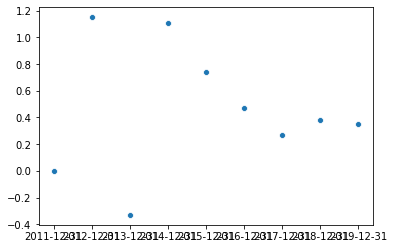

In [406]:
sns.scatterplot(data = df_income_date.loc['TZOO','eps'].sort_index(ascending =True))

# new start

# owner earnings

In [557]:
df_cash.columns

Index(['price', 'shares', 'netIncome', 'depreciationAndAmortization',
       'deferredIncomeTax', 'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivites',
       'netCashProvidedByOperatingActivites_prev',
       'netCashProvidedByOperatingActivites_change',
       'netCashProvidedByOperatingActivites_avg',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'debtRepayment_prev', 'debtRepayment_change',
       'debtRepayment_avg', 'commonStockIssued', 'commonStockIssued_prev',
       'commonStockIssued_change', 'commonStockIssued_avg',
       'commonStockRepurchased', 'commonStockRepurchased_prev',
       'commonStockRepurchased_change', 'commonStockRepurchased_

In [558]:
df_fin = df_income[['revenue','revenue_prev']]

In [559]:
df_fin['owner_ern'] = (df_cash['netCashProvidedByOperatingActivites'] + \
 df_cash['changeInWorkingCapital'] - df_cash['capitalExpenditure'] 
) / df_cash['shares']
            

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [560]:
df_fin['shares'] = df_main['sharesOutstanding']

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [561]:
df_fin['owner_prev'] = (df_cash['netCashProvidedByOperatingActivites_prev'] + \
 df_cash['changeInWorkingCapital'] - df_cash['capitalExpenditure'] 
) / df_cash['shares']

/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# TZOO

In [565]:
#free cash flow 

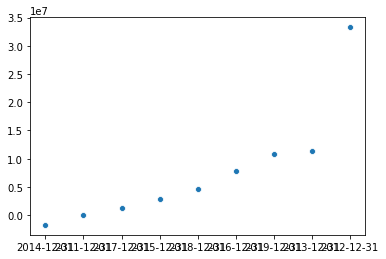

In [564]:
sns.scatterplot(data = df_cash_date.loc['TZOO','freeCashFlow'].sort_values(ascending = True))

In [624]:
df_tzoo_ern = df_cash_date.loc['TZOO']

In [625]:
df_tzoo_ern['shares'] = df_main.loc['TZOO','sharesOutstanding']


/Applications/anaconda3/envs/stocks/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [626]:
df_tzoo_ern = df_tzoo_ern.transform(lambda x: x / 1000)

In [627]:
df_tzoo_ern['owner_ern'] = (df_tzoo_ern['netCashProvidedByOperatingActivites'] + \
 df_tzoo_ern['changeInWorkingCapital'] - df_tzoo_ern['capitalExpenditure'] 
) / df_tzoo_ern['shares']

In [628]:
df_tzoo_ern['changeInWorkingCapital'].apply('mean')

124.0

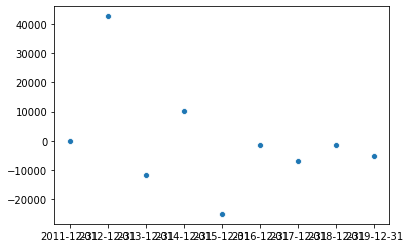

In [631]:
#working capital trend
sns.scatterplot(data = df_tzoo_ern['changeInWorkingCapital'].sort_index(ascending = True))

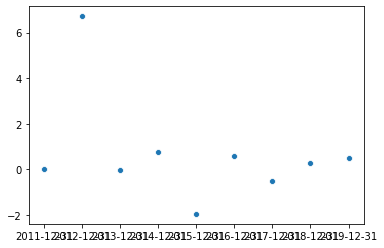

In [632]:
sns.scatterplot(data = df_tzoo_ern['owner_ern'].sort_index())

In [633]:
#average owner earn
df_tzoo_ern['owner_ern'].mean()

0.7018515898838434

# cash analysis

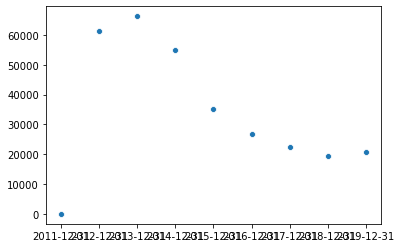

In [634]:
sns.scatterplot(data = df_tzoo_ern['cashAtEndOfPeriod'].sort_index())

In [635]:
df_tzoo_ern.cashAtEndOfPeriod

date
2019-12-31    20710.0
2018-12-31    19461.0
2017-12-31    22553.0
2016-12-31    26838.0
2015-12-31    35128.0
2014-12-31    54812.0
2013-12-31    66223.0
2012-12-31    61169.0
2011-12-31        0.0
Name: cashAtEndOfPeriod, dtype: float64

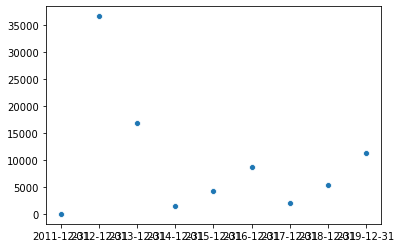

In [636]:
#operation cash
sns.scatterplot(data = df_tzoo_ern['netCashProvidedByOperatingActivites'].sort_index())

In [612]:
df_tzoo.columns

Index(['netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivites',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'shares', 'owner_ern'],
      dtype='object')

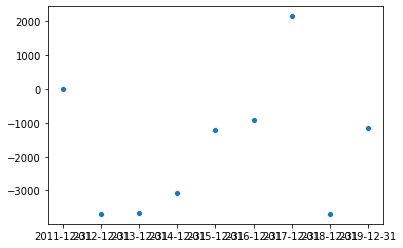

In [637]:
#investment cash
sns.scatterplot(data = df_tzoo_ern['netCashUsedForInvestingActivites'].sort_index())

In [639]:
df_tzoo_ern['netCashUsedForInvestingActivites']

date
2019-12-31   -1147.0
2018-12-31   -3685.0
2017-12-31    2152.0
2016-12-31    -909.0
2015-12-31   -1218.0
2014-12-31   -3060.0
2013-12-31   -3675.0
2012-12-31   -3693.0
2011-12-31       0.0
Name: netCashUsedForInvestingActivites, dtype: float64

In [617]:
df_tzoo['netCashUsedForInvestingActivites'].mean() / df_tzoo['netCashProvidedByOperatingActivites']

date
2019-12-31   -0.150657
2018-12-31   -0.318371
2017-12-31   -0.815404
2016-12-31   -0.194081
2015-12-31   -0.403811
2014-12-31   -1.106391
2013-12-31   -0.100450
2012-12-31   -0.046125
2011-12-31        -inf
Name: netCashProvidedByOperatingActivites, dtype: float64

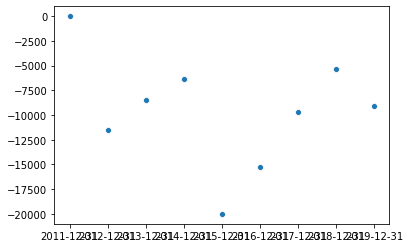

In [640]:
#financing 
sns.scatterplot(data = df_tzoo_ern['netCashUsedProvidedByFinancingActivities'].sort_index())

In [641]:
df_tzoo_ern['netCashUsedProvidedByFinancingActivities']

date
2019-12-31    -9106.0
2018-12-31    -5292.0
2017-12-31    -9712.0
2016-12-31   -15262.0
2015-12-31   -20012.0
2014-12-31    -6334.0
2013-12-31    -8452.0
2012-12-31   -11510.0
2011-12-31        0.0
Name: netCashUsedProvidedByFinancingActivities, dtype: float64

In [642]:
df_tzoo_ern.shares

date
2019-12-31    11310.4
2018-12-31    11310.4
2017-12-31    11310.4
2016-12-31    11310.4
2015-12-31    11310.4
2014-12-31    11310.4
2013-12-31    11310.4
2012-12-31    11310.4
2011-12-31    11310.4
Name: shares, dtype: float64

# balance Tzoo

In [643]:
df_tzoo_bal = df_balance_date.loc['TZOO']

In [656]:
df_tzoo_bal['shares'] = df_main.loc['TZOO','sharesOutstanding']

In [645]:
df_tzoo_bal = df_tzoo.transform(lambda x: x / 1000)

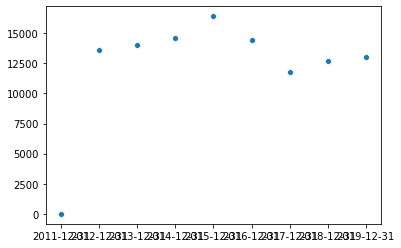

In [647]:
#recievables 
sns.scatterplot(data=df_tzoo_bal['netReceivables'].sort_index())

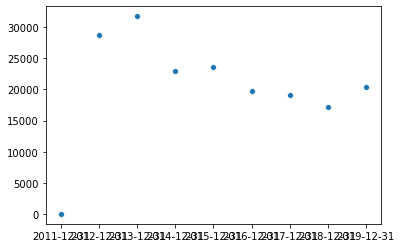

In [648]:
#payables
sns.scatterplot(data=df_tzoo_bal['accountPayables'].sort_index())

In [ ]:
df_tzoo_bal.sh

In [669]:
df_tzoo_bal['liq_val'] = (df_tzoo_bal['totalCurrentAssets'] -  \
(df_tzoo_bal['totalCurrentLiabilities'])) \
/(df_tzoo_bal['shares'] /1000)


In [672]:
df_tzoo_bal.shares * df_main.loc['TZOO','price']

date
2019-12-31    50557488.0
2018-12-31    50557488.0
2017-12-31    50557488.0
2016-12-31    50557488.0
2015-12-31    50557488.0
2014-12-31    50557488.0
2013-12-31    50557488.0
2012-12-31    50557488.0
2011-12-31    50557488.0
Name: shares, dtype: float64

In [673]:
df_tzoo_ern.changeInWorkingCapital

date
2019-12-31    -5240.0
2018-12-31    -1290.0
2017-12-31    -6997.0
2016-12-31    -1403.0
2015-12-31   -25015.0
2014-12-31    10149.0
2013-12-31   -11742.0
2012-12-31    42654.0
2011-12-31        0.0
Name: changeInWorkingCapital, dtype: float64